# EDA (Exploratory Data Analysis)

- Loading, cleaning, manipulating, and visualising the data for performing machine learning tools to solve problems.

## Let's explore the features or columns of the data

- **InvoiceNo:** Invoice number of the transaction
- **StockCode:** Unique code of the product
- **Description:** Product Description
- **Quantity:** Product quantity in the transaction
- **InvoiceDate:** Date and time of the transaction
- **UnitPrice:** Product unit price
- **CustomerID:** Unique ID of the customer
- **Country:** Country where the transaction occurred

## Tasks to perform

- Loading the data.
- Check for missing values, redundacy, or unnecessary columns.
- Explore the statistics of the dataset, including measures of central tendency and dispersion.
- perform data visualisation to gain insghts of the data. Generate appropriate plots, such as plots, histograms, bar, and scattering. 
- Analyse the sales trends over time. **Identify the busiest months, days of the weeks in terms of sales.**
- **Explore the top-selling products and countries based on the quantity sold.**
- **Analyse any outliers or anomalies in the dataset and explain how they can affect the data.**
- Draw conclusions and summarise your findings from the EDA. 

In [1]:
#Importing all the necessary librabries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the data

In [2]:
data_retail = pd.read_excel("Online Retail.xlsx")

#View the first five enteries of the data
data_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#View the last five enteries of the data
data_retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
#Checking the data types
data_retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

## Checking for any missing values

In [5]:
data_retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**So, 1454 and 135080 are the missing values in Description and Customer ID respectively.**

## Dropping the missing values

In [6]:
data_retail = data_retail.dropna()

In [7]:
#Checking again if there's any missing value in the data
data_retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Removing redundancy

In [8]:
remove = ["InvoiceNo", "StockCode"]
data_retail_updated = data_retail.drop(columns = remove)

In [9]:
#Checkng the first five enteries of the new data
data_retail_updated.head(5)

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Dropping the duplicate rows

In [10]:
data_retail_updated = data_retail_updated.drop_duplicates()
data_retail_updated.shape

(401528, 6)

## Total Sell Amount

Creating a new column that indicates the total sell amount by multiplying Quantity and UnitPrice.

In [11]:
data_retail_updated["Totalsell"] = data_retail_updated["Quantity"] * data_retail_updated["UnitPrice"]
data_retail_updated.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalsell
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
data_retail_updated.head()

## Statistical Summary

In [14]:
#Using the describe method for statistical overview 
data_retail_updated.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Totalsell
count,401528.000000,401528,401528.000000,401528.000000,401528.000000
mean,12.183723,2011-07-10 12:12:07.670498816,3.474295,15281.185711,20.613519
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,-168469.600000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000,4.250000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000,11.700000
75%,12.000000,2011-10-20 12:03:00,3.750000,16788.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,250.306467,NaN,69.770623,1714.034187,430.390504


**The negative value indcates that the customers return some products and get the refund.**

## Measuring the central tendency

In [ ]:
#Calculate the median value. Dropping description and country comuns since they are in string format.
updated_df = data_retail_updated.drop(columns = ["Description", "Country"])
updated_df.head()
median_df = updated_df.median()
median_df


**The mean of the totalsell is higher than the median that means the data is either right skewed (positively skewed) or left-skewed(negatively skewed).**

In [15]:
data_retail_updated.columns

Index(['Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country', 'Totalsell'],
      dtype='object')

In [16]:
#Let's add another column MonthYear.
data_retail_updated["Monthyear"] = data_retail_updated["InvoiceDate"].dt.to_period("M")

data_retail_updated.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalsell,Monthyear
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


## Plotting a line graph to overview the totalsell over time

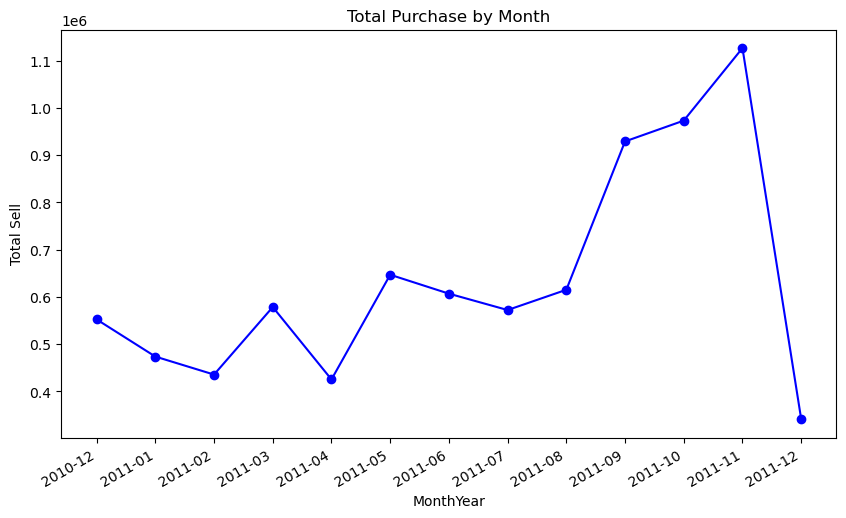

In [17]:
# Groupby the data 
monthly_year = data_retail_updated.groupby("Monthyear")["Totalsell"].sum().reset_index()

#Coverting the Monthyear column into str
monthly_year["Monthyear"] = monthly_year["Monthyear"].astype(str)

#Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

#Automating x-labels
fig.autofmt_xdate()

#Display the plot
plt.plot(monthly_year["Monthyear"], monthly_year["Totalsell"], marker = "o", linestyle = "-", color = "b")

#Set the title
plt.title("Total Purchase by Month")
plt.xlabel("MonthYear")
plt.ylabel("Total Sell");

**The sales were high between August to November then a sudden drop down in the month of December.**

## Plot a bar graph 

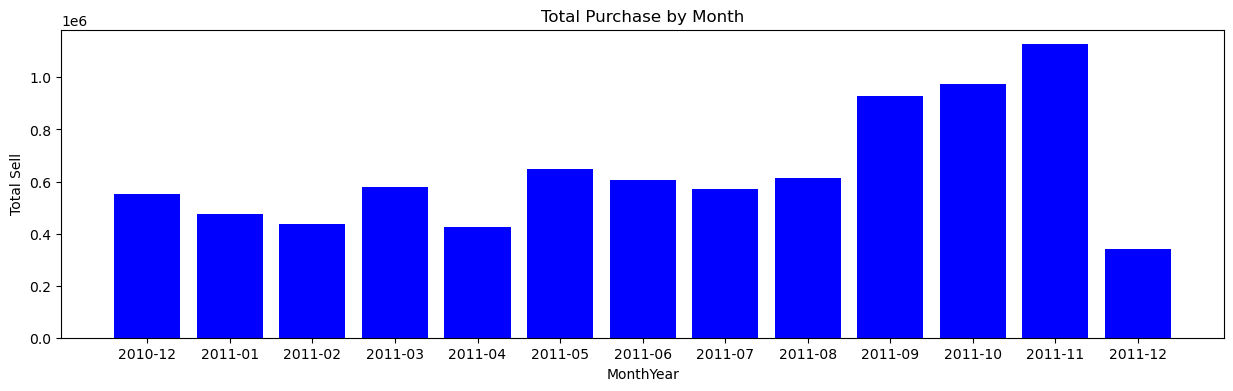

In [18]:
fig, ax = plt.subplots(figsize = (15, 4))

plt.bar(monthly_year["Monthyear"], monthly_year["Totalsell"], color = "b")


#Set the title
plt.title("Total Purchase by Month")
plt.xlabel("MonthYear")
plt.ylabel("Total Sell");

## Heatmap overview for Totalsell dependence on quantity

In [32]:
data_retail_updated.head()
req_rem = ["Description", "Country", "InvoiceDate", "Monthyear", "CustomerID"]
ht_df = data_retail_updated.drop(columns=req_rem, axis=1)
ht_df.head()

,Quantity,UnitPrice,Totalsell
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


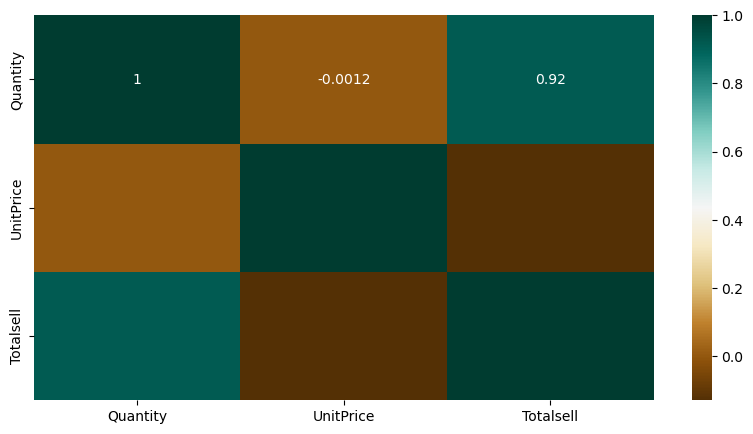

In [33]:
plt.figure(figsize=(10, 5))
corr = ht_df.corr()
sns.heatmap(corr, cmap="BrBG", annot=True);

In [34]:
ht_df.corr()

,Quantity,UnitPrice,Totalsell
Quantity,1.000000,-0.001243,0.916132
UnitPrice,-0.001243,1.000000,-0.129312
Totalsell,0.916132,-0.129312,1.000000


## Analyse the sales trends over time

In [35]:
# Extract the month from the 'InvoiceDate'
data_retail_updated['Month'] = data_retail_updated['InvoiceDate'].dt.month

# Extract the day of the week from the 'InvoiceDate'
data_retail_updated['DayOfWeek'] = data_retail_updated['InvoiceDate'].dt.day_name()

# Calculate total sales for each month
monthly_sales = data_retail_updated.groupby('Month')['Totalsell'].sum()

# Calculate total sales for each day of the week
daily_sales = data_retail_updated.groupby('DayOfWeek')['Totalsell'].sum()

# Identify the busiest month
busiest_month = monthly_sales.idxmax()

# Identify the busiest day of the week
busiest_day = daily_sales.idxmax()

# Print the results
print('\033[1m' + "Busiest Month (in terms of sells):" +'\033[0m', busiest_month)
print('\033[1m' + "Busiest Day of the Week (in terms of sales):" +'\033[0m', busiest_day)

Busiest Month (in terms of sells): 11
Busiest Day of the Week (in terms of sales): Thursday


## Bar Plot

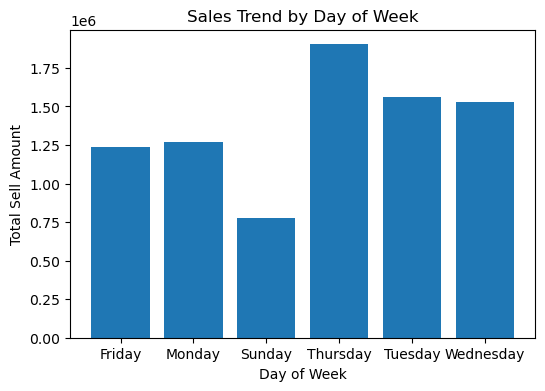

In [36]:
plt.figure(figsize=(6, 4))
plt.bar(daily_sales.index, daily_sales.values)
plt.xlabel('Day of Week')
plt.ylabel('Total Sell Amount')
plt.title('Sales Trend by Day of Week');

## Top selling products and countries

In [37]:
# Find most valualble Items in the list
items_total_sell = data_retail_updated.groupby('Description')['Totalsell'].sum()

# Sort the items based on the total sells in ascending order
most_valuable_items = items_total_sell.sort_values(ascending=False)

# Convert the Series to a DataFrame
most_valuable_items_df = pd.DataFrame(most_valuable_items, columns=['Totalsell']).reset_index()

# Count the total number of items
total_items = data_retail_updated['Description'].nunique()

# Print the total number of Items and the top 10 items
print('\033[1m' + f"Among {total_items} items, the 10 most valuable items are:" +'\033[0m', list(most_valuable_items_df['Description'][:10]))

Among 3896 items, the 10 most valuable items are: ['REGENCY CAKESTAND 3 TIER', 'WHITE HANGING HEART T-LIGHT HOLDER', 'JUMBO BAG RED RETROSPOT', 'PARTY BUNTING', 'POSTAGE', 'ASSORTED COLOUR BIRD ORNAMENT', 'RABBIT NIGHT LIGHT', 'CHILLI LIGHTS', "PAPER CHAIN KIT 50'S CHRISTMAS ", 'PICNIC BASKET WICKER 60 PIECES']


In [38]:
# Find country with most sells in the list
countrywise_sell = data_retail_updated.groupby('Country')['Totalsell'].sum()

# Sort countries based on the total sells in ascending order
top_selling_country = countrywise_sell.sort_values(ascending=False)

# Convert the Series to a DataFrame
top_selling_country_df = pd.DataFrame(top_selling_country, columns=['Totalsell']).reset_index()

# Count the total countries
total_countries = data_retail_updated['Country'].nunique()

# Print the total countries and the top 10 countries
print('\033[1m' + f"Among {total_countries} countries, the top 10 selling countries are:" +'\033[0m', list(top_selling_country_df['Country'][:10]))

Among 37 countries, the top 10 selling countries are: ['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France', 'Australia', 'Switzerland', 'Spain', 'Belgium', 'Sweden']


**In this scenario, having awareness of the most prized goods ('DOTCOM POSTAGE', 'REGENCY CAKESTAND 3 TIER', 'PARTY BUNTING'...) and popular selling regions ('United Kingdom', 'Netherlands', 'EIRE'...) enables us to make informed choices based on data. This allows us to enhance efficiency, stay ahead in the market competition, and make strategic decisions. This data offers essential understandings into customer habits, market shifts, and overall business effectiveness, empowering companies to improve customer service and attain lasting prosperity.**

##  Identify any Outliers or Anomalies in the Dataset

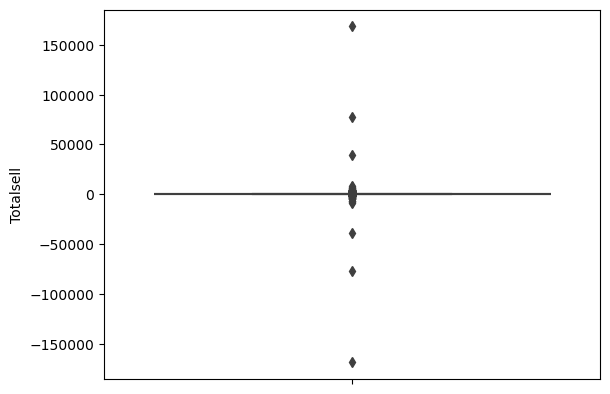

In [39]:
# Create a box plot
sns.boxplot(data=data_retail_updated, y='Totalsell')

# Display the plot
plt.show();

## Measuring Z-Score

In [42]:
from scipy import stats

# Calculate the Z-Score for the 'Quantity' column
z_scores = stats.zscore(data_retail_updated['Totalsell'])

# Create a boolean mask to identify outliers (both positive and negative Z-scores)
threshold = 3
outlier_mask = abs(z_scores) > threshold

# Extract outliers from the DataFrame
outliers = data_retail_updated[outlier_mask]

outliers.shape

(252, 10)